In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/willlieeee/dsa-monkeypox/refs/heads/main/DATA.csv'
response = requests.get(url)

if response.status_code == 200:
    with open('database_monkeypox.csv', 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

CSV file downloaded successfully.


In [3]:
from os import path
path.exists(r"database_monkeypox.csv")

True

# Library and CSV

***library***

In [4]:
url = 'https://raw.githubusercontent.com/willlieeee/dsa-monkeypox/refs/heads/main/requirements.txt'
response = requests.get(url)

if response.status_code == 200:
    with open('requirements.txt', 'wb') as file:
        file.write(response.content)
    print("Library requirements file downloaded successfully. Please install the required libraries using the command 'pip install -r requirements.txt'")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

Library requirements file downloaded successfully. Please install the required libraries using the command 'pip install -r requirements.txt'


In [5]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


***import library***

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, mean_squared_error, r2_score
from pathlib import Path
from scipy.stats import chi2_contingency

***variable for saving output***

In [7]:
import os

output_folder = 'output'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' created successfully.")
else:
    print(f"Folder '{output_folder}' already exists.")

Folder 'output' already exists.


# CSV and column

***reading CSV and cut column***

In [8]:
mp1 = pd.read_csv(r"database_monkeypox.csv")
mp1

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


**filtering MonkeyPox == Positive**

In [9]:
positive = mp1[mp1['MonkeyPox']=='Positive']
positive.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
6,P6,Fever,False,True,False,False,False,False,True,False,Positive


***cut "Systemic Illness" and "Patient_ID" column***

In [10]:
mp2 = mp1.drop('Systemic Illness', axis=1)
mp3 = mp2.drop('Patient_ID', axis=1)
mp3

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,False,True,True,True,False,True,False,False,Negative
1,True,False,True,True,False,False,True,False,Positive
2,False,True,True,False,False,False,True,False,Positive
3,True,False,False,False,True,True,True,False,Positive
4,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...
24995,True,True,False,True,True,False,False,True,Positive
24996,False,True,True,False,True,True,True,True,Positive
24997,True,True,False,False,True,True,False,False,Positive
24998,False,True,False,True,True,True,False,False,Negative


***show 1000 data***

In [11]:
mp4 = mp3.head(1000)

# Graph

**Pie chart for percentage MonkeyPox database**

In [12]:
# Uncomment to use this plot

# fig = px.pie(mp1, names='MonkeyPox', color='MonkeyPox',
#              color_discrete_map={'Positive': 'green', 'Negative': 'red'},
#              title="Monkeypox Cases")

# fig.update_traces(textfont_size=12, pull=[0.1, 0])
# fig.show()

**Pie chart for Systemic Illness**

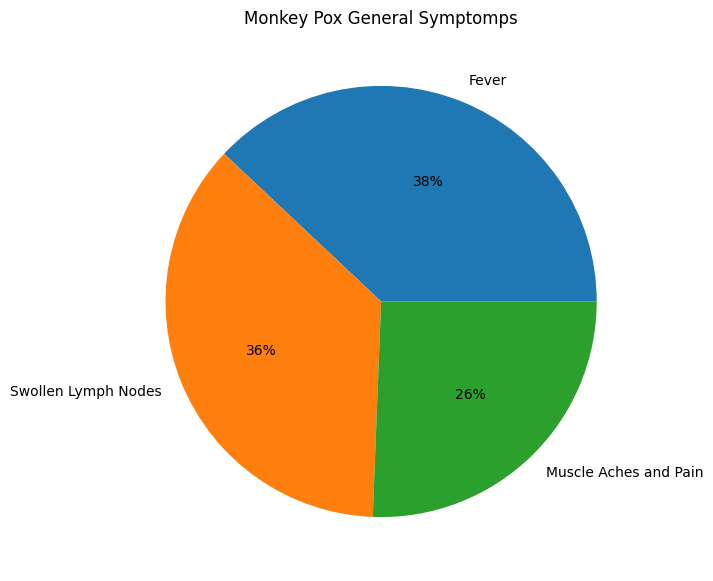

In [13]:
fig = plt.figure(figsize=(14, 7))
plt.pie(x=positive['Systemic Illness'].value_counts(),labels = positive['Systemic Illness'].value_counts().index,autopct='%.0f%%')
plt.title('Monkey Pox General Symptomps')
plt.show()

**Bar chart for every column with filter "Positive"**

In [14]:
for column in mp3.columns:
    value_counts = mp3[column].value_counts()

    fig = go.Figure(data=[go.Bar(
        x=value_counts.index,
        y=value_counts.values,
        marker_color=['green' if val == True else 'red' for val in value_counts.index] # Set color based on True/False
    )])

    fig.update_layout(
        title=f'Bar Plot of {column}',
        xaxis_title='Value',
        yaxis_title='Count'
    )

# Uncomment to use this plot "fig.show()"

# fig.show()

# Chi Square Test

***chi square test -> save to .txt***

In [15]:
results = []
output_file_name = "chi2_result.txt"
os.makedirs(output_folder, exist_ok=True)
output_file_path = os.path.join(output_folder, output_file_name)


with open(output_file_path, 'w') as f:
    for col in ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']:
        observed = pd.crosstab(mp4[col], mp4['MonkeyPox'])
        chi2, p, dof, expected = chi2_contingency(observed)
        
        output = f"Chi-square test for {col} vs Monkeypox:\n"
        output += f"Chi-square statistic: {chi2:.4f}\n"
        output += f"P-value: {p:.4f}\n"
        if p <= 0.05:
            output += "Not Rejected\n"
        else:
            output += "Rejected\n"
        output += "--------------------------\n"
        
        print(output)

        f.write(output)
        
        results.append({"Feature": col, "Chi2": chi2, "P-value": p})

Chi-square test for Rectal Pain vs Monkeypox:
Chi-square statistic: 10.2154
P-value: 0.0014
Not Rejected
--------------------------

Chi-square test for Sore Throat vs Monkeypox:
Chi-square statistic: 0.6272
P-value: 0.4284
Rejected
--------------------------

Chi-square test for Penile Oedema vs Monkeypox:
Chi-square statistic: 0.5700
P-value: 0.4503
Rejected
--------------------------

Chi-square test for Oral Lesions vs Monkeypox:
Chi-square statistic: 4.0377
P-value: 0.0445
Not Rejected
--------------------------

Chi-square test for Solitary Lesion vs Monkeypox:
Chi-square statistic: 3.3682
P-value: 0.0665
Rejected
--------------------------

Chi-square test for Swollen Tonsils vs Monkeypox:
Chi-square statistic: 0.1859
P-value: 0.6664
Rejected
--------------------------

Chi-square test for HIV Infection vs Monkeypox:
Chi-square statistic: 14.1338
P-value: 0.0002
Not Rejected
--------------------------

Chi-square test for Sexually Transmitted Infection vs Monkeypox:
Chi-square s

# Model 1: Random Forest

**Model training**

Accuracy: 0.6704
Classification Report:
               precision    recall  f1-score   support

    Negative       0.58      0.21      0.31      1754
    Positive       0.68      0.92      0.78      3246

    accuracy                           0.67      5000
   macro avg       0.63      0.56      0.55      5000
weighted avg       0.65      0.67      0.62      5000

                          Feature  Importance
2                   HIV Infection    0.409665
0                     Rectal Pain    0.299275
3  Sexually Transmitted Infection    0.259534
1                    Oral Lesions    0.031526


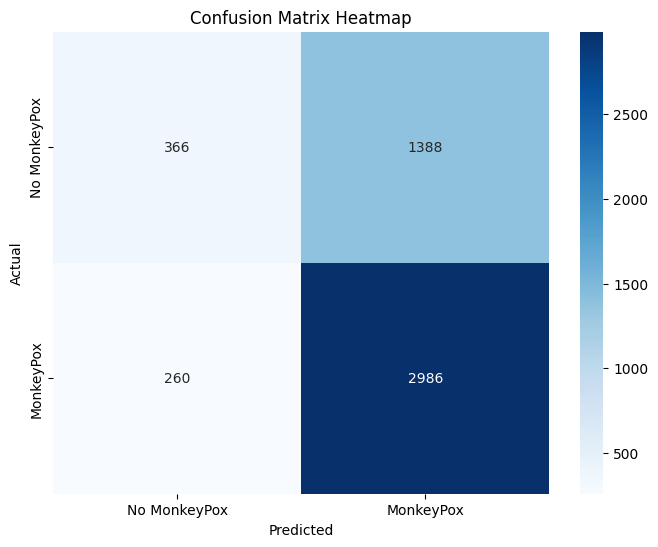

In [16]:
X = mp3[['Rectal Pain', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']]
y = mp3['MonkeyPox']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training
rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No MonkeyPox', 'MonkeyPox'], yticklabels=['No MonkeyPox', 'MonkeyPox'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Model output using feature importance**

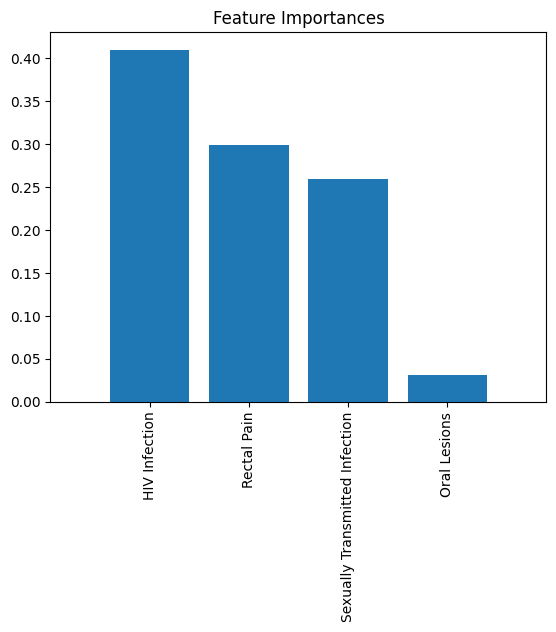

In [17]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

**All model accuracy**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions with the best model
best_y_pred = best_rf_model.predict(X_test)

# Evaluate the best model's accuracy
best_accuracy = accuracy_score(y_test, best_y_pred)
print("Best Accuracy:", best_accuracy)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}
Best Accuracy: 0.6704


c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
201 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\mwill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

# Model 2: Logistic Regression

**Replacing X value to 1 and 0**

In [19]:
mp6 = mp3
mp6 = mp6.replace({True: 1, False: 0})
mp6.head()

C:\Users\mwill\AppData\Local\Temp\ipykernel_48476\1915547027.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,0,1,1,1,0,1,0,0,Negative
1,1,0,1,1,0,0,1,0,Positive
2,0,1,1,0,0,0,1,0,Positive
3,1,0,0,0,1,1,1,0,Positive
4,1,1,1,0,0,1,1,0,Positive


In [20]:
if X.isnull().values.any() or y.isnull().values.any():
    X = X.dropna()
    y = y[X.index]

**Model Training**

In [21]:
# Assuming mp3 is already defined as your DataFrame
X = mp6[['Rectal Pain', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']]
y = mp6['MonkeyPox']
y = y.map({'Positive': 1, 'Negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()
print('P-values:')
print(result.pvalues)

importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance['Importance'] = np.abs(feature_importance['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance)

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.21      0.31      1754
           1       0.68      0.92      0.78      3246

    accuracy                           0.67      5000
   macro avg       0.63      0.56      0.55      5000
weighted avg       0.65      0.67      0.62      5000

Optimization terminated successfully.
         Current function value: 0.625286
         Iterations 5
P-values:
const                              1.583053e-43
Rectal Pain                       8.580552e-111
Oral Lesions                       5.497034e-18
HIV Infection                     7.852346e-121
Sexually Transmitted Infection     1.426477e-87
dtype: float64
Feature Importance:
                          Feature  Importance
2                   HIV Infection    0.650406
0                     Rectal Pain    0.587130
3  Sexually Transmitted Infection    0.544028
1                    Oral Lesions    0.224344


# Mosaic Plot

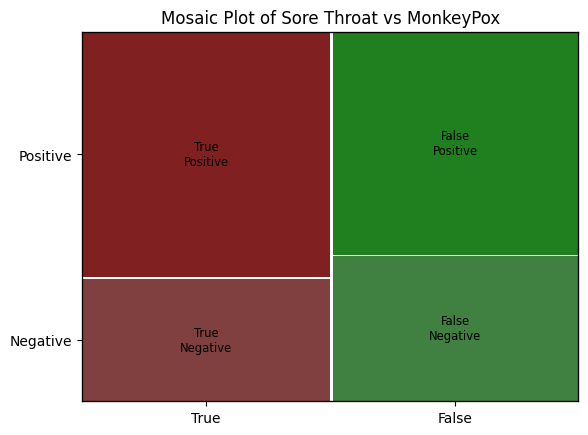

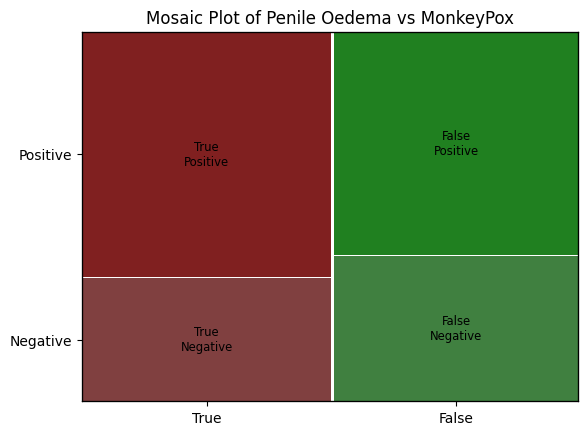

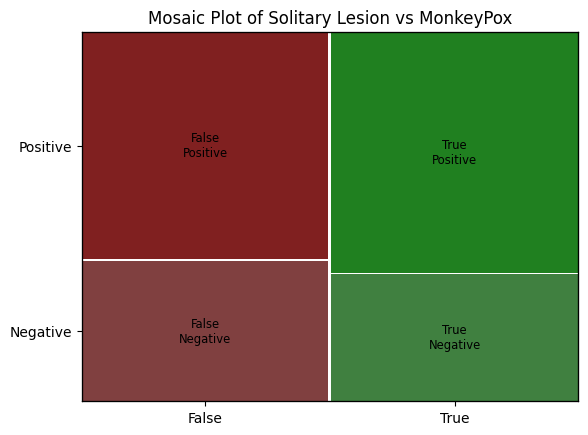

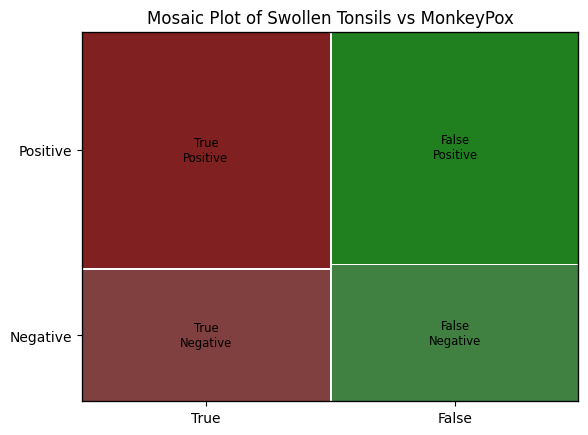

In [22]:
from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt

# Create a mosaic plot for 'Sore Throat' vs 'MonkeyPox'
mosaic(mp3, ['Sore Throat', 'MonkeyPox'], title='Mosaic Plot of Sore Throat vs MonkeyPox')
mosaic(mp3, ['Penile Oedema', 'MonkeyPox'], title='Mosaic Plot of Penile Oedema vs MonkeyPox')
mosaic(mp3, ['Solitary Lesion', 'MonkeyPox'], title='Mosaic Plot of Solitary Lesion vs MonkeyPox')
mosaic(mp3, ['Swollen Tonsils', 'MonkeyPox'], title='Mosaic Plot of Swollen Tonsils vs MonkeyPox')
plt.show()